In [1]:
# Load library packages
import pandas as pd

import numpy as np
from sklearn.linear_model import LinearRegression

import seaborn as sns
%matplotlib inline

import matplotlib as mpl,matplotlib.font_manager as mf,matplotlib.pyplot as plt

# time series - statsmodels
import statsmodels.api as sm
from statsmodels.tsa.filters.hp_filter import hpfilter  # Hodrick Prescott filter for cyclic & trend separation
from statsmodels.tsa.seasonal import seasonal_decompose # Error Trend Seasonality decomposition

# holt winters
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   # single exponential smoothing as in ewm of pandas
from statsmodels.tsa.holtwinters import ExponentialSmoothing # double and triple exponential smoothing

# consistent plot size wherever not specifiied
from pylab import rcParams
rcParams['figure.figsize'] = (12,5)
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
rcParams['axes.labelsize'] = 12

In [2]:
df= pd.read_excel('/content/drive/MyDrive/CompanyProfit.xlsx',index_col=0)
df.head()

,PlayerNumbers,Top-up Point,CompanyProfit
Date,,,
2019-01-01,8651,9845,53006
2019-02-01,7619,64961,51364
2019-03-01,4205,64973,59922
2019-04-01,8530,39116,77661
2019-05-01,5092,26227,56531


In [3]:
print(df)

            PlayerNumbers  Top-up Point  CompanyProfit
Date                                                  
2019-01-01           8651          9845          53006
2019-02-01           7619         64961          51364
2019-03-01           4205         64973          59922
2019-04-01           8530         39116          77661
2019-05-01           5092         26227          56531
2019-06-01           3557         93064          54692
2019-07-01           7889         79346          78868
2019-08-01           2512         87545          53911
2019-09-01           5422         97971          78969
2019-10-01           6497         60326          73853
2019-11-01           1957         13397          71443
2019-12-01           9155          1548          76239
2020-01-01           4103          2302          65576
2020-02-01           6729         87982          60607
2020-03-01           8118         64299          91447
2020-04-01           1966         87155          89623
2020-05-01

Data Preprocessing

Dealing with Missing Values

In [4]:
# Do we have missing values?
df.isnull().sum().sort_values(ascending=False).head()

PlayerNumbers    0
Top-up Point     0
CompanyProfit    0
dtype: int64

Forecasting with Holt Winters Method

1. Split into training and test set

In [5]:
# Split into train and test set
train_df = df[:36]
test_df = df[36:]

In [6]:
len(test_df)

12

Fit the model on the train set

Seasonal periods with value 12 indicates the seasonality we expect in the data. for airline passenger we can safely assume that the seasonality would repeat every 12 months.

In [7]:
fitted_model = ExponentialSmoothing(train_df['CompanyProfit'],trend='mul',seasonal='mul',seasonal_periods=12).fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [8]:
test_predictions = fitted_model.forecast(12).rename('HW Test Forecast')

In [9]:
test_predictions[:12]

2022-01-01    70961.884374
2022-02-01    59897.851327
2022-03-01    81609.101727
2022-04-01    64081.468587
2022-05-01    67700.059230
2022-06-01    76945.631626
2022-07-01    59638.835351
2022-08-01    62679.332201
2022-09-01    68381.335038
2022-10-01    54841.010606
2022-11-01    65884.386802
2022-12-01    61242.346025
Freq: MS, Name: HW Test Forecast, dtype: float64

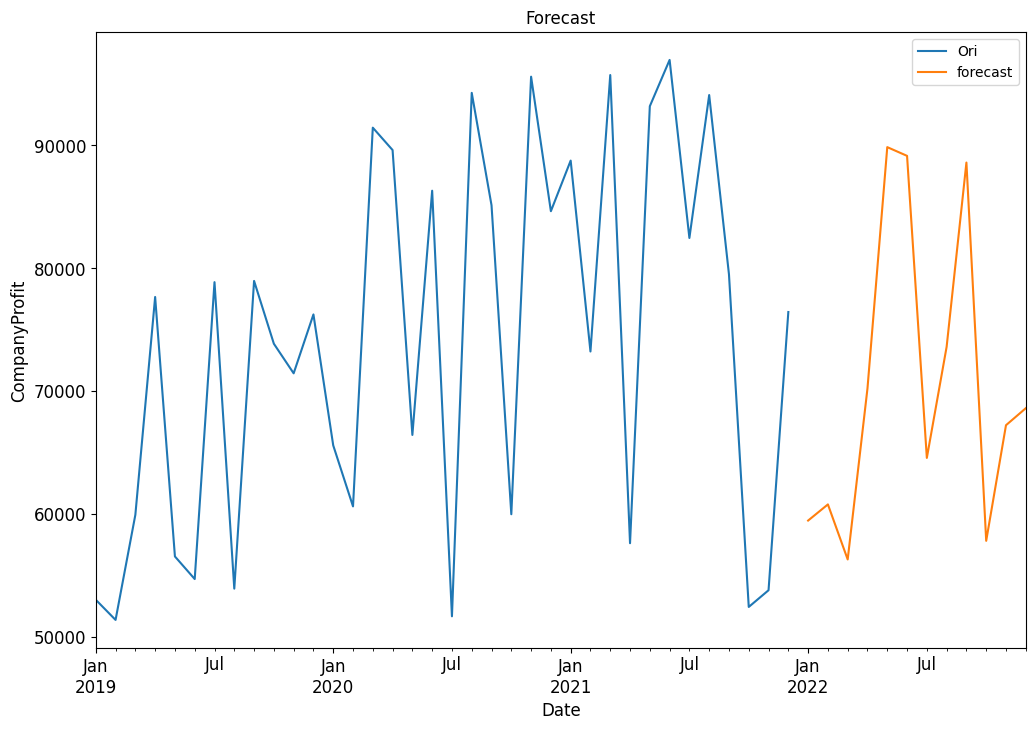

In [10]:
train_df['CompanyProfit'].plot(legend=True,label='Ori')
test_df['CompanyProfit'].plot(legend=True,label='forecast',figsize=(12,8))
plt.ylabel("CompanyProfit")
plt.xlabel("Date")
plt.title('Forecast');

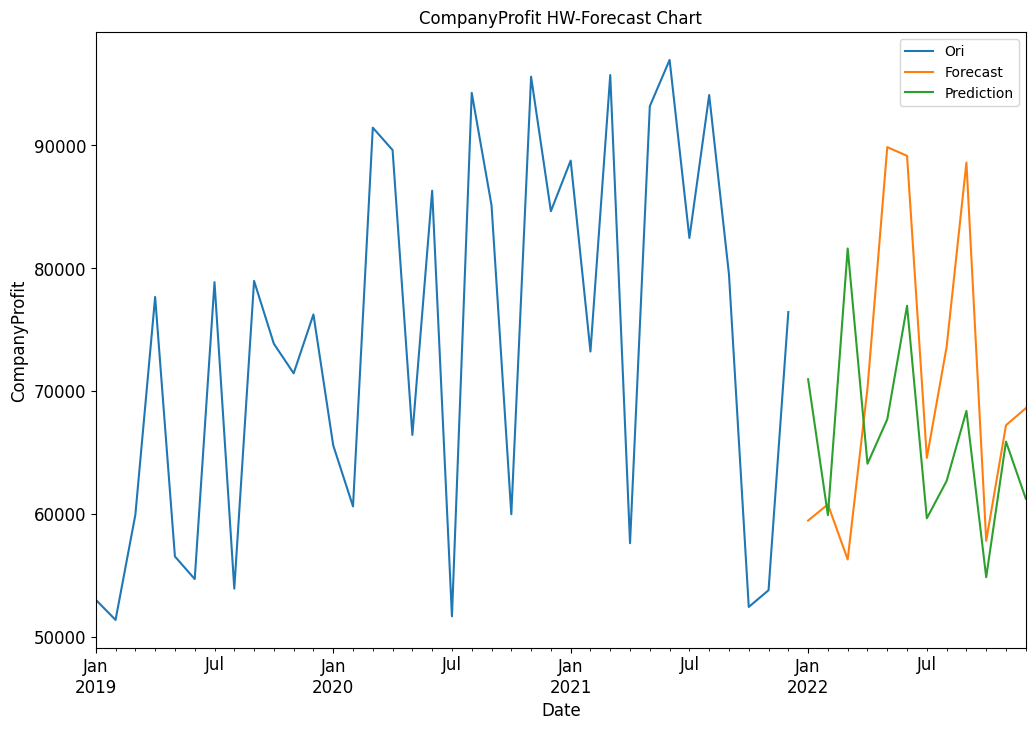

In [11]:
#Next we will plot also the predicted test data

train_df['CompanyProfit'].plot(legend=True,label='Ori')
test_df['CompanyProfit'].plot(legend=True,label='Forecast',figsize=(12,8))
test_predictions.plot(legend=True,label='Prediction')
plt.ylabel("CompanyProfit")
plt.xlabel("Date")
plt.title('CompanyProfit HW-Forecast Chart');

Evaluation metrics

In [12]:
final_model = ExponentialSmoothing(df['CompanyProfit'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [13]:
forecast_predictions = final_model.forecast(steps=12)

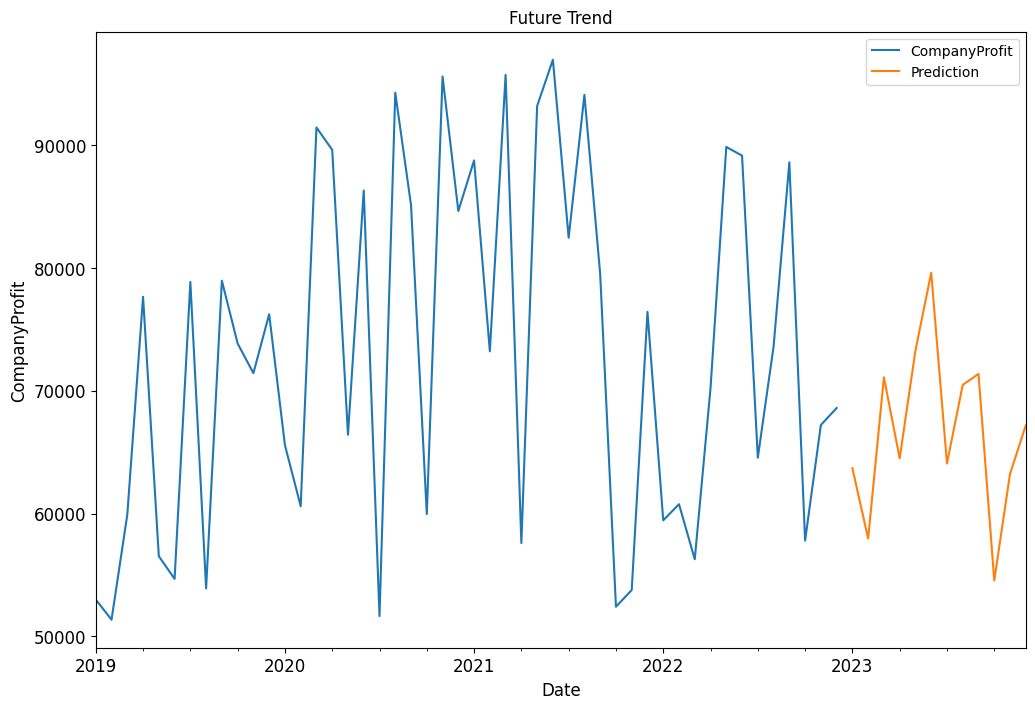

In [14]:
df['CompanyProfit'].plot(figsize=(12,8),legend=True,label='CompanyProfit')
forecast_predictions.plot(legend=True,label='Prediction')
plt.ylabel("CompanyProfit")
plt.xlabel("Date")
plt.title('Future Trend');

In [15]:
forecast_predictions[:12]

2023-01-01    63697.578462
2023-02-01    57974.144462
2023-03-01    71101.572365
2023-04-01    64504.847409
2023-05-01    73273.221752
2023-06-01    79620.004914
2023-07-01    64079.993967
2023-08-01    70481.761015
2023-09-01    71379.305575
2023-10-01    54553.729884
2023-11-01    63240.271617
2023-12-01    67184.203334
Freq: MS, dtype: float64